<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#OLS-estimation" data-toc-modified-id="OLS-estimation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OLS estimation</a></span></li><li><span><a href="#OLS-non-linear-curve-but-linear-in-parameters" data-toc-modified-id="OLS-non-linear-curve-but-linear-in-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OLS non-linear curve but linear in parameters</a></span></li><li><span><a href="#Introduction::-OLS-with-two-features" data-toc-modified-id="Introduction::-OLS-with-two-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction:: OLS with two features</a></span></li></ul></div>

# Statistics ： Lineaer models

In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.sandbox.regression.predstd import wls_prediction_std
plt.style.use('seaborn')

## OLS estimation

Artificial data:

In [24]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x,x**2))
beta = np.array([1,0.1,10])
e = np.random.normal(size = nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [26]:
model = sm.OLS(y, X)
resultat = model.fit()
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.163e+06
Date:                Sat, 13 Jan 2018   Prob (F-statistic):          1.52e-244
Time:                        15:24:42   Log-Likelihood:                -134.05
No. Observations:                 100   AIC:                             274.1
Df Residuals:                      97   BIC:                             281.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2449      0.276      4.509      0.0

In [27]:
print('Parameters:', resultat.params)
print('R2:', resultat.rsquared)

Parameters: [  1.24487859   0.09426868  10.00197635]
R2: 0.99999060655


In [9]:
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv'
data = pda.read_csv(url, index_col=0)
data[['Girth','Height']]

pandas.core.frame.DataFrame

## OLS non-linear curve but linear in parameters

In [55]:
nsample = 50
sig = 0.5
x = np.linspace(0,20,nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 0.5]

y_true = np.dot(X,beta)
y = y_true + sig * np.random.normal(size = nsample)

In [56]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           8.74e-26
Time:                        15:42:34   Log-Likelihood:                -38.663
No. Observations:                  50   AIC:                             85.33
Df Residuals:                      46   BIC:                             92.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4622      0.029     16.084      0.0

In [57]:
print( 'Parameters:', res.params)
print( 'Standard errors', res.bse)
print( 'Predicted values:', res.predict())

Parameters: [ 0.46215596  0.6088222  -0.01584783  0.6447458 ]
Standard errors [ 0.02873421  0.11295755  0.00252288  0.18631369]
Predicted values: [ 0.24855015  0.74088627  1.18823855  1.55742671  1.82724506  1.99194655
  2.06218695  2.06327418  2.03101027  2.00580919  2.02605696  2.12180491
  2.30983236  2.5908898   2.94957563  3.35686654  3.77488598  4.16312722
  4.48510839  4.71436646  4.83880495  4.8626814   4.80590785  4.70077935
  4.58666797  4.50355409  4.48545774  4.55484919  4.71895715  4.96858113
  5.27960304  5.61694972  5.94035539  6.21097715  6.39777682  6.48262039
  6.46325737  6.3536906   6.18187554  5.98512736  5.80399007  5.67557533
  5.62746507  5.67317985  5.80995751  6.01920694  6.26956257  6.52203766
  6.73642967  6.87792546]


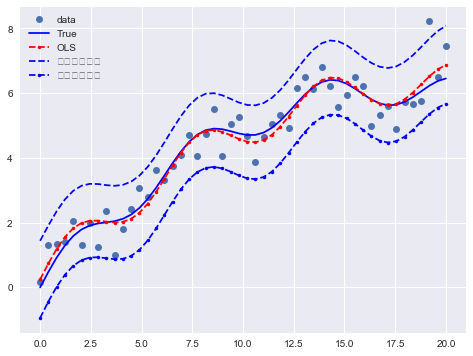

prstd [ 0.59223873  0.58398118  0.58001973  0.57798502  0.57530477  0.57084265
  0.56550334  0.56150954  0.56077687  0.56342387  0.56750906  0.57020193
  0.56952084  0.56552982  0.56035619  0.55698556  0.55742289  0.56137472
  0.56643783  0.56964721  0.56926142  0.56572054  0.56133097  0.55884581
  0.55971088  0.56313202  0.5666622   0.56785143  0.56580646  0.56175168
  0.5583069   0.55783669  0.56085292  0.56561352  0.56923667  0.56950249
  0.56618647  0.56123042  0.5576615   0.55777934  0.56171615  0.56742456
  0.5720986   0.57396957  0.57335349  0.5724302   0.57389178  0.57922589
  0.58778482  0.59733653]


In [73]:
fig, ax = plt.subplots(figsize = (8, 6))
prstd, iv_l, iv_u = wls_prediction_std(res)

ax.plot(x,y, 'o', label = 'data')
ax.plot(x, y_true, 'b-', label = 'True')
ax.plot(x, res.fittedvalues,'r--.', label='OLS')
ax.plot(x, iv_u,'b--', label = '置信区间上界')
ax.plot(x, iv_l,'b--.', label='置信区间下届')
ax.legend(loc = 'best')
plt.show()
print('prstd', prstd)

In [92]:
%timeit (res.fittedvalues - y_true)**2
%timeit np.power((res.fittedvalues - y_true),2)

6.21 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.74 µs ± 78 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Introduction:: OLS with two features

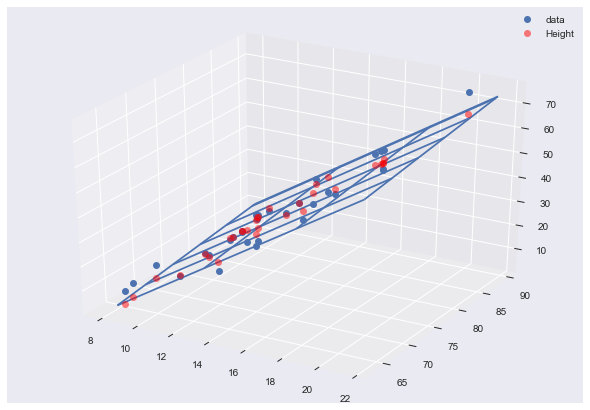

0     -3.561809
1     -3.962908
2     -3.809144
3      7.690594
4     11.451358
5     12.469920
6      7.797083
7     11.092268
8     13.103698
9     12.047515
10    13.775543
11    13.327934
12    13.327934
13    12.270386
14    15.854249
15    19.760075
16    23.126434
17    25.303646
18    22.388655
19    19.945837
20    26.295494
21    27.878179
22    27.237521
23    33.386120
24    36.655198
25    42.647210
26    43.899133
27    45.064545
28    45.522483
29    45.522483
30    59.707135
dtype: float64

In [118]:
# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv'
data = pd.read_csv(url)
## Fit regression model
X = data[['Girth', 'Height']]
X = sm.add_constant(X)
y = data['Volume']
results = sm.OLS(y,X).fit()
XX = np.arange(8, 22, 0.5)
YY = np.arange(64, 90, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results.params[0] + results.params[1]*xx +  results.params[2]*yy

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X['Girth'], X['Height'], y , 'o', label = 'data')
ax.plot(X['Girth'], X['Height'], results.fittedvalues, 'ro', alpha = 0.5)
ax.plot_wireframe(xx, yy, zz, rstride = 10, cstride = 10)
ax.legend(loc = 'best')
plt.show()

prd_std, iv_l, iv_b = wls_prediction_std(results)
iv_l